# Práctica 5. Clustering

### a) Importar librerías necesarias

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.cluster import hierarchy
import scipy.spatial.distance as sc
from mpl_toolkits.mplot3d import Axes3D
from helpers import countries
import ipympl
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
%matplotlib ipympl

In [4]:
path=('./data/1_data_limpia/Environment_LandUse_clean.csv')
data = pd.read_csv(path, encoding='latin-1')

# Clustering

## 1. Hierarchical clustering

In [5]:
# Selección de variables
X = np.array(data[['Agricultural land', 'Naturally regenerating forest','Forest land']])
y = np.array(data['area_code'])

In [6]:
# Clusterig jerarquico scipy
HC = hierarchy.linkage(X,metric='euclidean',method='complete')

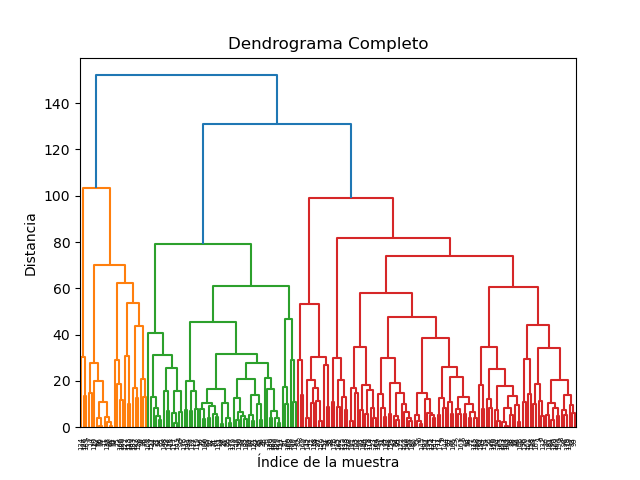

In [7]:
#Dendograma
plt.title('Dendrograma Completo')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
dn = hierarchy.dendrogram(HC)
plt.show()

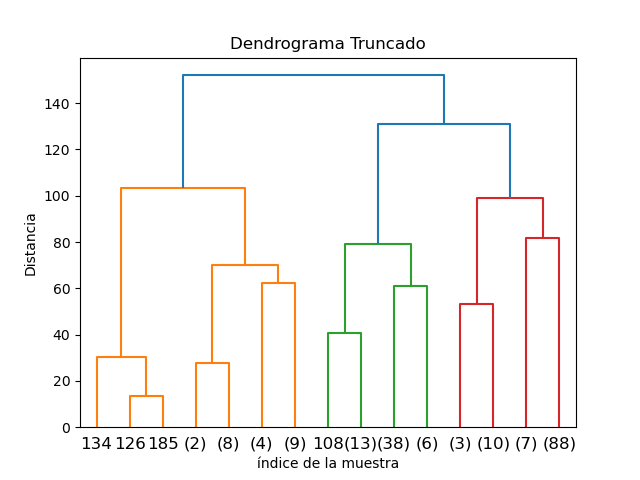

In [8]:
#%% Modificar el aspecto del dendrograma
#plt.figure(figsize=(25,15))
plt.figure()
plt.title('Dendrograma Truncado')
plt.xlabel('índice de la muestra')
plt.ylabel('Distancia')
dn = hierarchy.dendrogram(HC, truncate_mode='level',p=3)
plt.show()

In [9]:
#%% Clustering jerárquico sklearn
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
grupos=cluster.fit_predict(X)

In [10]:
data['cluster'] = grupos

In [11]:
data[['area', 'cluster']].head(10)

,area,cluster
0,Armenia,1
1,Afghanistan,1
2,Albania,1
3,Algeria,1
4,American Samoa,2
5,Andorra,1
6,Angola,1
7,Antigua and Barbuda,0
8,Argentina,1
9,Australia,1


In [12]:
data[['area', 'cluster']].query('area == "Mexico"')

,area,cluster
103,Mexico,1


Text(0.5, 0, 'Forest land')

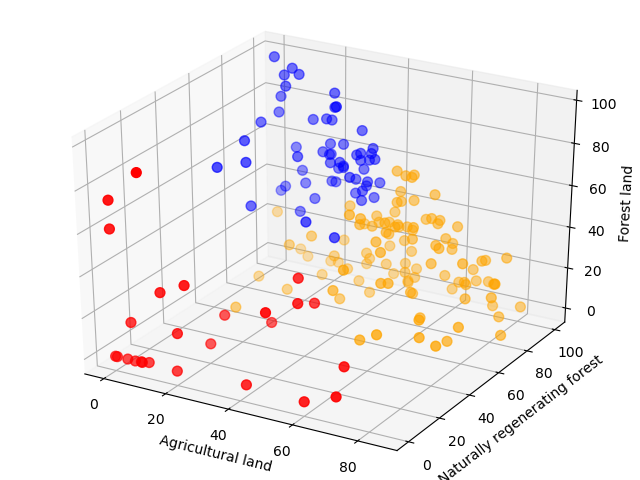

In [13]:
#%% Gráfica con los 3 clústers
colores=['red','orange','blue']
asignar=[]
for row in grupos:
    asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=asignar, s=50)
ax.set_xlabel('Agricultural land')
ax.set_ylabel('Naturally regenerating forest')
ax.set_zlabel('Forest land')

In [14]:
#%%Extraer los elementos de cada clúster
#Cluster 1
idx_0 = grupos==0
subdata_0 = pd.DataFrame(X[idx_0])

In [15]:
res = data.describe()
res[['Agricultural land', 'Naturally regenerating forest', 'Forest land']]

,Agricultural land,Naturally regenerating forest,Forest land
count,192.000000,192.000000,192.000000
mean,36.753385,78.153594,32.165469
std,21.677841,31.553531,24.748446
min,0.000000,0.000000,0.000000
25%,19.507500,72.285000,11.117500
50%,35.225000,94.205000,31.180000
75%,52.195000,99.122500,47.705000
max,85.640000,100.000000,97.410000


In [16]:
res_0 = subdata_0.describe()
res_0

,0,1,2
count,26.000000,26.000000,26.000000
mean,23.787692,7.733077,19.397692
std,21.540840,13.326969,25.073730
min,0.000000,0.000000,0.000000
25%,6.935000,0.000000,0.177500
50%,19.085000,0.000000,8.905000
75%,42.205000,11.620000,33.755000
max,69.820000,39.290000,90.020000


In [17]:
pd.value_counts(data['area'][idx_0])

Antigua and Barbuda      1
Bahrain                  1
Anguilla                 1
Belgium                  1
Tokelau                  1
Saint Kitts and Nevis    1
Palau                    1
Qatar                    1
Portugal                 1
Poland                   1
Pitcairn                 1
Czechia                  1
Vanuatu                  1
Nauru                    1
Libya                    1
Kuwait                   1
Israel                   1
Ireland                  1
Iceland                  1
Greenland                1
Kiribati                 1
Gibraltar                1
Egypt                    1
Cabo Verde               1
Bermuda                  1
Isle of Man              1
Name: area, dtype: int64

In [18]:
idx_1 = grupos==1
subdata_1 =pd.DataFrame(X[idx_1])
res_1=subdata_1.describe()

In [19]:
res_1

,0,1,2
count,108.000000,108.000000,108.000000
mean,48.659444,87.400926,20.485000
std,18.455462,15.875117,14.757495
min,0.920000,34.430000,0.010000
25%,39.212500,81.425000,8.632500
50%,46.740000,94.675000,18.045000
75%,60.582500,99.305000,32.432500
max,85.640000,100.000000,55.110000


In [20]:
pd.value_counts(data['area'][idx_1])

Armenia         1
Eritrea         1
Singapore       1
Sierra Leone    1
Senegal         1
               ..
Guinea          1
Guatemala       1
Greece          1
Ghana           1
China           1
Name: area, Length: 108, dtype: int64

In [21]:
#Cluster 3
idx_2 = grupos==2
subdata_2 = pd.DataFrame(X[idx_2])
res_2=subdata_2.describe()
res_2

,0,1,2
count,58.000000,58.000000,58.000000
mean,20.395690,92.502241,59.638793
std,10.688548,12.316165,16.337410
min,0.540000,50.280000,33.440000
25%,10.895000,91.490000,46.110000
50%,20.170000,98.375000,56.935000
75%,30.147500,99.687500,71.190000
max,39.160000,100.000000,97.410000


In [22]:
pd.value_counts(data['area'][idx_2])

American Samoa                        1
Timor-Leste                           1
Liechtenstein                         1
Malaysia                              1
Martinique                            1
Micronesia (Federated States of)      1
Nepal                                 1
New Caledonia                         1
Niue                                  1
Norway                                1
Panama                                1
Papua New Guinea                      1
Peru                                  1
Guinea-Bissau                         1
Puerto Rico                           1
Austria                               1
RÃ©union                              1
Saint Lucia                           1
Saint Vincent and the Grenadines      1
Seychelles                            1
Slovenia                              1
Slovakia                              1
Suriname                              1
Sweden                                1
Trinidad and Tobago                   1
